# Results

In [1]:
from ammo.msm import MSMCollection, MSM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import subprocess

<>:10: DeprecationWarning: invalid escape sequence \A
<>:10: DeprecationWarning: invalid escape sequence \A
<>:10: DeprecationWarning: invalid escape sequence \A
<>:10: DeprecationWarning: invalid escape sequence \A
/tmp/ipykernel_2927972/3835566319.py:10: DeprecationWarning: invalid escape sequence \A
  features = ['domain angle/$^{o}$', 'hinge RMSD/$\AA$', 'PBC RMSD/$\AA$']
/tmp/ipykernel_2927972/3835566319.py:10: DeprecationWarning: invalid escape sequence \A
  features = ['domain angle/$^{o}$', 'hinge RMSD/$\AA$', 'PBC RMSD/$\AA$']
/home/adele/Documents/allostery/ammo/msm/_msm.py:455: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/home/adele/anaconda3/envs/bss/lib/python3.9/site-packages/deeptime/clustering/_kmeans.py:466: UserWarning: Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.
  warnings.warn(f"Algorithm did not reach convergence crite

## Notebook contents

1. [MSM building](#1.-MSM-building)<br>
    1.1 [Load data](#1.1-Load-data)<br>
    1.2 [Cluster](#1.2-Cluster)<br>
    1.3 [Compute ITS](#1.3-Compute-ITS)<br>
    1.4 [Build MSMs](#1.4-Build-MSMs)<br>
2. [Metastable state assignment](#2.-Metastable-state-assignment)<br>
    2.1 [PCCA](#2.1-PCCA)<br>
    2.2 [Manual](#2.2-Manual)<br>
    2.3 [Bootstrapping](#2.3-Bootstrapping)<br>
3. [Sample conformational ensembles](#3.-Sample-conformational-ensembles)<br>
    3.1 [Full ensemble](#3.1-Full-ensemble)<br>
    3.2 [Active state](#3.2-Active-state)<br>
4. [Relevant conformation plots](#4.-Relevant-conformation-plots)<br>
    4.1 [cAMP Hbonds](#4.1-cAMP-Hbonds)<br>
    4.2 [PBC conformation](#4.2-PBC-conformation)<br>
    4.3 [Hinge RMSF](#4.3-Hinge-RMSF)<br>
    4.4 [Residue 273 $\chi$1 angle](#4.4-Residue-273-$\chi$1-angle)<br>
    4.5 [I942 Hbonds](#4.5-I942-Hbonds)<br>

## 1. MSM building

### 1.1 Load data

[top](#Results)

In [2]:
titles = ['apo', 'cAMP', 'L273W', 'I942', 'I942r', 'I942 lid', 'I942 PBC']
locations = [['../systems/apo/active/seeded-md_2step', '../systems/apo/inactive/seeded-md_2step'],
             ['../systems/cAMP/active/seeded-md_2step', '../systems/cAMP/inactive/seeded-md_2step'],
             ['../systems/L273W/active/seeded-md_2step', '../systems/L273W/inactive/seeded-md_2step'],
             ['../systems/I942/active/seeded-md_2step', '../systems/I942/inactive/seeded-md_2step'],
             ['../systems/I942/active/seeded-md_restr_both', '../systems/I942/inactive/seeded-md_restr_both'],
             ['../systems/I942/active/seeded-md_restr_lid', '../systems/I942/inactive/seeded-md_restr_lid'],
             ['../systems/I942/active/seeded-md_restr_pbc', '../systems/I942/inactive/seeded-md_restr_pbc']]
file_names = ['domain_angle.txt', 'hinge.txt', 'pbc.txt']
features = ['domain angle/$^{o}$', 'hinge RMSD/$\AA$', 'PBC RMSD/$\AA$']

In [3]:
msms = MSMCollection()

In [2]:
msms = MSMCollection('msms_full.pkl')

In [4]:
msms.load_data(titles, locations, file_names, features=features, missing='warn', reload=True)

Loading data...
apo MSM
../systems/apo/active/seeded-md_2step
../systems/apo/inactive/seeded-md_2step
trajectory 100/100
--------------------
cAMP MSM
../systems/cAMP/active/seeded-md_2step
../systems/cAMP/inactive/seeded-md_2step
trajectory 100/100
--------------------
L273W MSM
../systems/L273W/active/seeded-md_2step
../systems/L273W/inactive/seeded-md_2step
trajectory 100/100
--------------------
I942 MSM
../systems/I942/active/seeded-md_2step
../systems/I942/inactive/seeded-md_2step
trajectory 100/100
--------------------
I942r MSM
../systems/I942/active/seeded-md_restr_both
../systems/I942/inactive/seeded-md_restr_both
trajectory 100/100
--------------------
I942 lid MSM
../systems/I942/active/seeded-md_restr_lid
../systems/I942/inactive/seeded-md_restr_lid
trajectory 100/100
--------------------
I942 PBC MSM
../systems/I942/active/seeded-md_restr_pbc
../systems/I942/inactive/seeded-md_restr_pbc
trajectory 100/100
--------------------
...done.


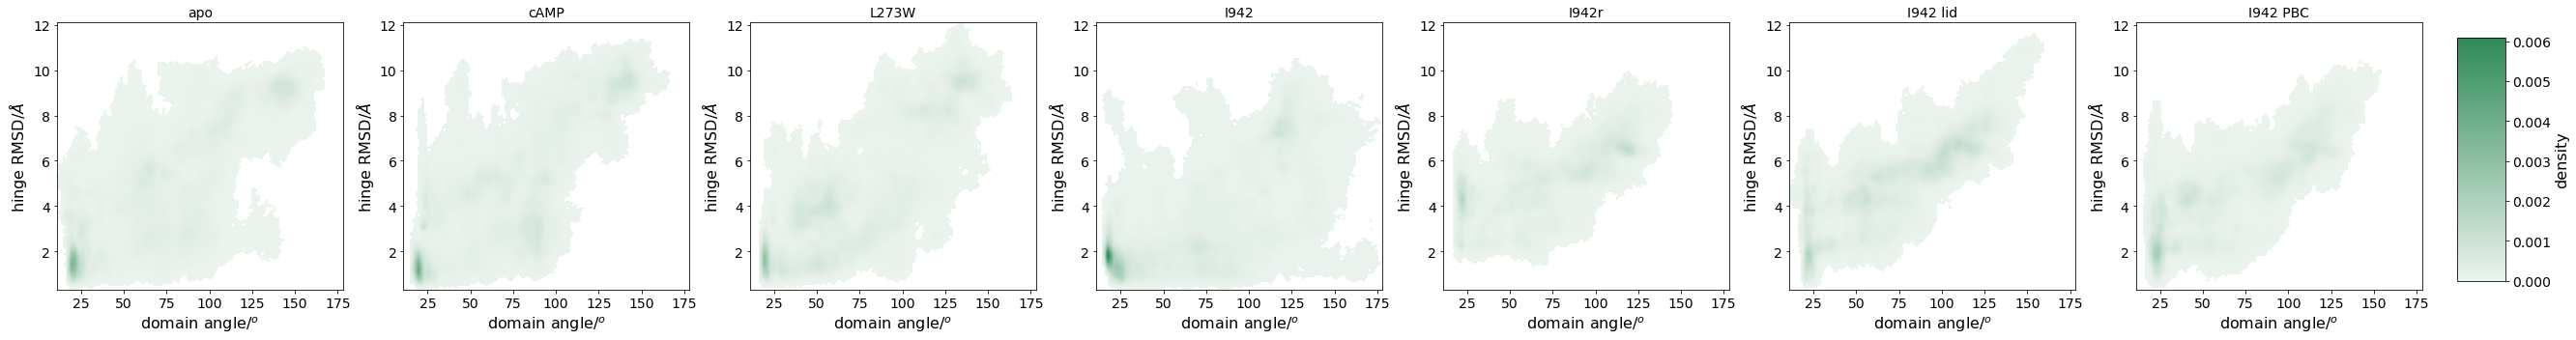

In [5]:
fig, ax, misc = msms.plot_data((1,7))

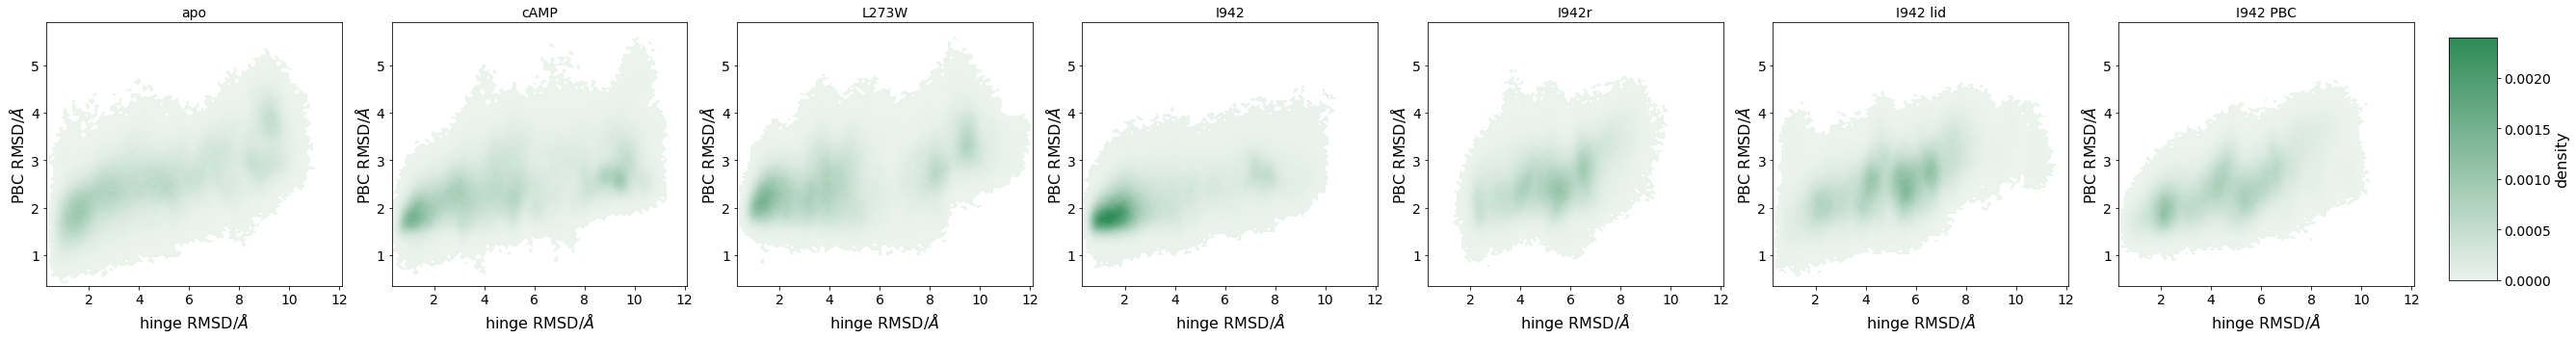

In [6]:
fig, ax, misc = msms.plot_data((1,7), x=1, y=2)

### 1.2 Cluster

[top](#Results)

In [7]:
msms.cluster(n_clusters=300, centers=np.loadtxt('clusters.txt'))

01-03-24 14:01:40 pyemma.coordinates.clustering.kmeans.KmeansClustering[0] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.


In [8]:
msms.assign_to_clusters()

### 1.3 Compute ITS

[top](#Results)

Computing ITS...
apo
cAMP
L273W
I942
I942r
I942 lid
I942 PBC
...done.


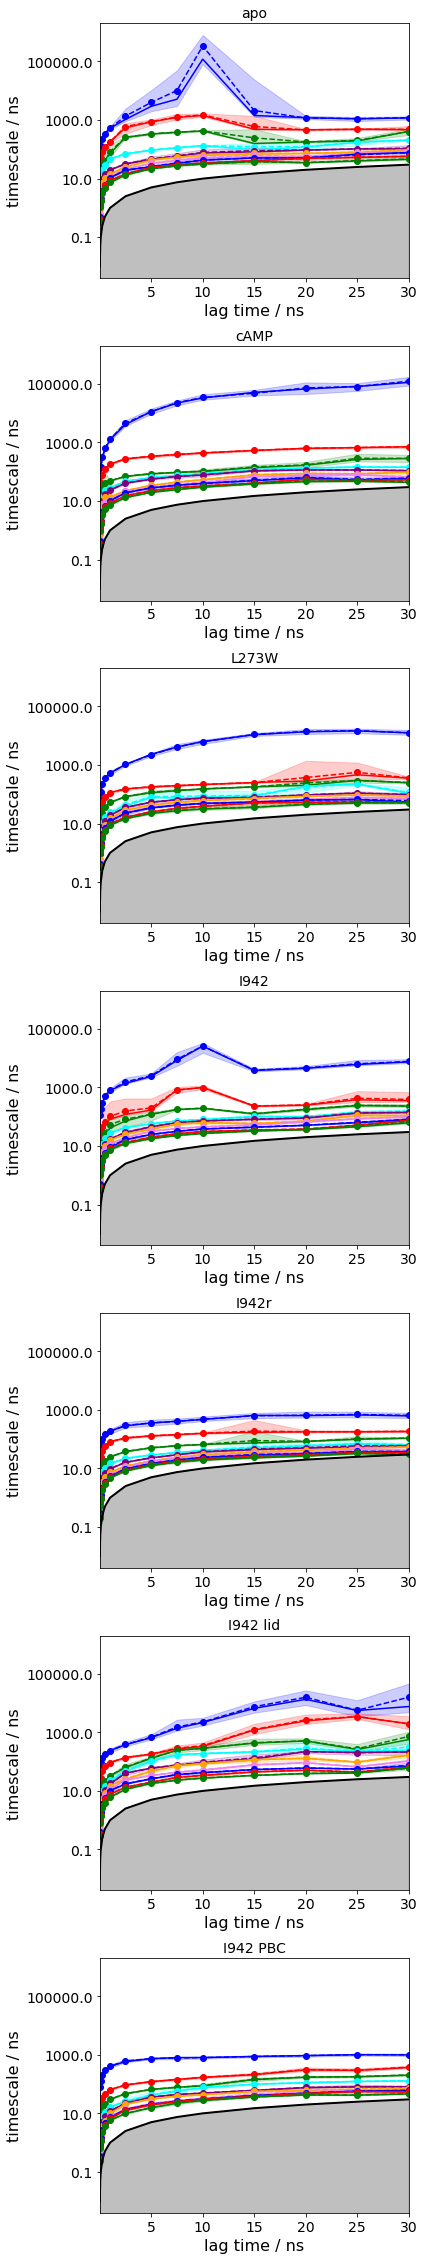

In [9]:
fig, ax = msms.compute_its(titles=titles, time_units='ns')

### 1.4 Build MSMs

[top](#Results)

25 ns lag time based on ITS above

In [ ]:
msms.build_msms('25 ns')

Create a custom colour map that will exclude some of the lightest colours, but 0% probability regions will still be white. This will allow for better contrast between regions of 0 probability and regions that have lower probability. The probability densities are quite diffuse for some systems, making it harder to see the results.

In [589]:
color_list = sns.cubehelix_palette(50, start=2, rot=0, dark=0.1, light=1)

color_list_fixed = []
for i in range(50):
    if i > 0 and i < 5:
        continue
    else:
        color_list_fixed.append(color_list[i])
        
cmap = LinearSegmentedColormap.from_list('custom', color_list_fixed)

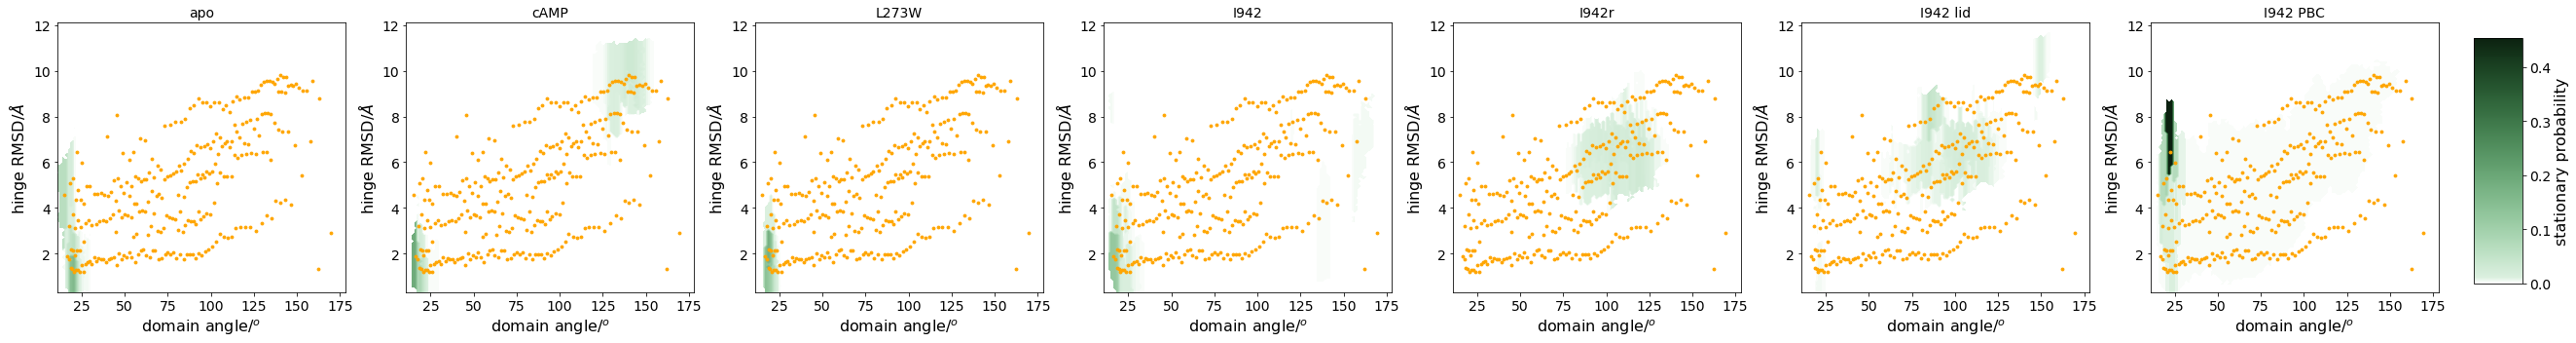

In [593]:
fig, ax, misc = msms.plot_stationary_distribution((1,7), titles=titles, cmap=cmap)

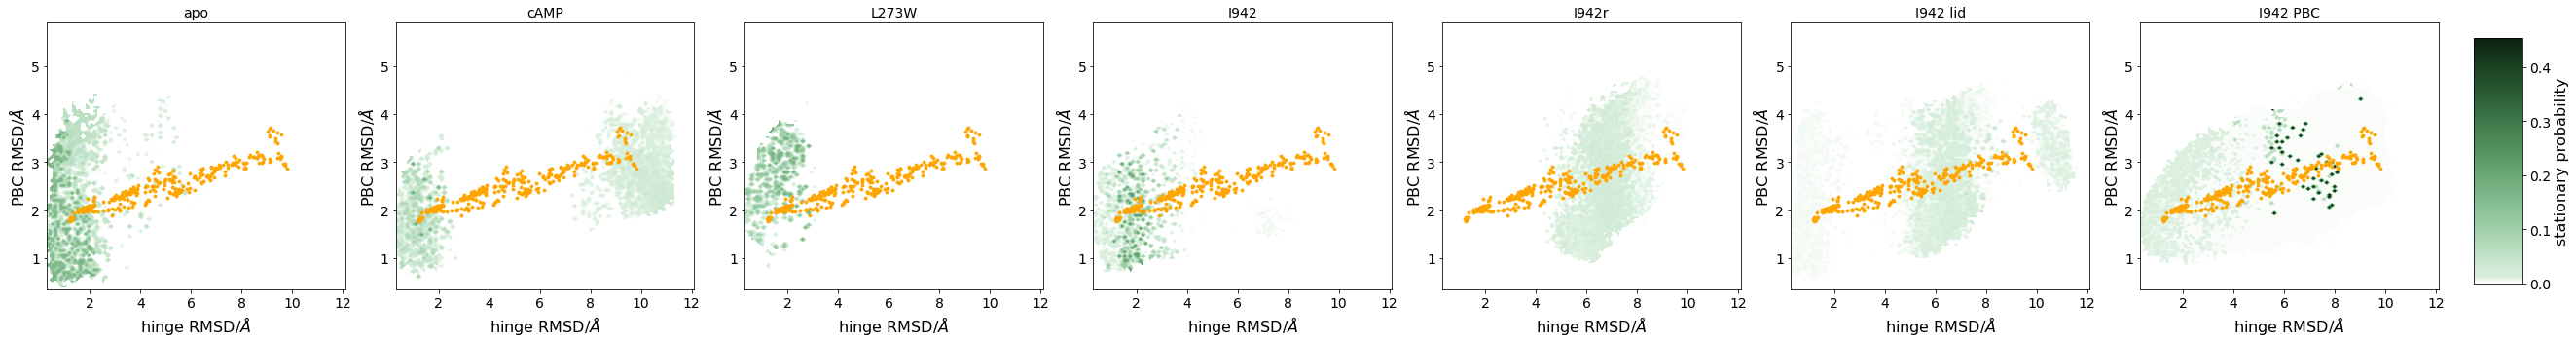

In [590]:
fig, ax, misc = msms.plot_stationary_distribution((1,7), x=1, y=2, titles=titles, cmap=cmap)

## 2. Metastable state assignment

### 2.1 PCCA

[top](#Results)

In [635]:
msms.pcca_assignments(3, titles=titles)

Metastable state assignments based on apo MSM, 3 states:
apo
MS 1 has 163 counts and 99.96% probability (± 2.37%)
MS 2 has 83 counts and 0.03% probability (± 0.0%)
MS 3 has 54 counts and 0.0% probability (± 0.0%)
--------------------
cAMP
MS 1 has 163 counts and 59.81% probability (± 1.87%)
MS 2 has 83 counts and 3.12% probability (± 0.06%)
MS 3 has 54 counts and 37.08% probability (± 0.88%)
--------------------
L273W
MS 1 has 163 counts and 99.7% probability (± 2.56%)
MS 2 has 83 counts and 0.06% probability (± 0.0%)
MS 3 has 54 counts and 0.24% probability (± 0.0%)
--------------------
I942
MS 1 has 163 counts and 93.7% probability (± 2.33%)
MS 2 has 83 counts and 2.41% probability (± 0.04%)
MS 3 has 54 counts and 3.89% probability (± 0.09%)
--------------------
I942r
MS 1 has 163 counts and 9.19% probability (± 0.19%)
MS 2 has 83 counts and 82.31% probability (± 1.01%)
MS 3 has 54 counts and 8.5% probability (± 0.5%)
--------------------
I942 lid
MS 1 has 163 counts and 25.96% proba

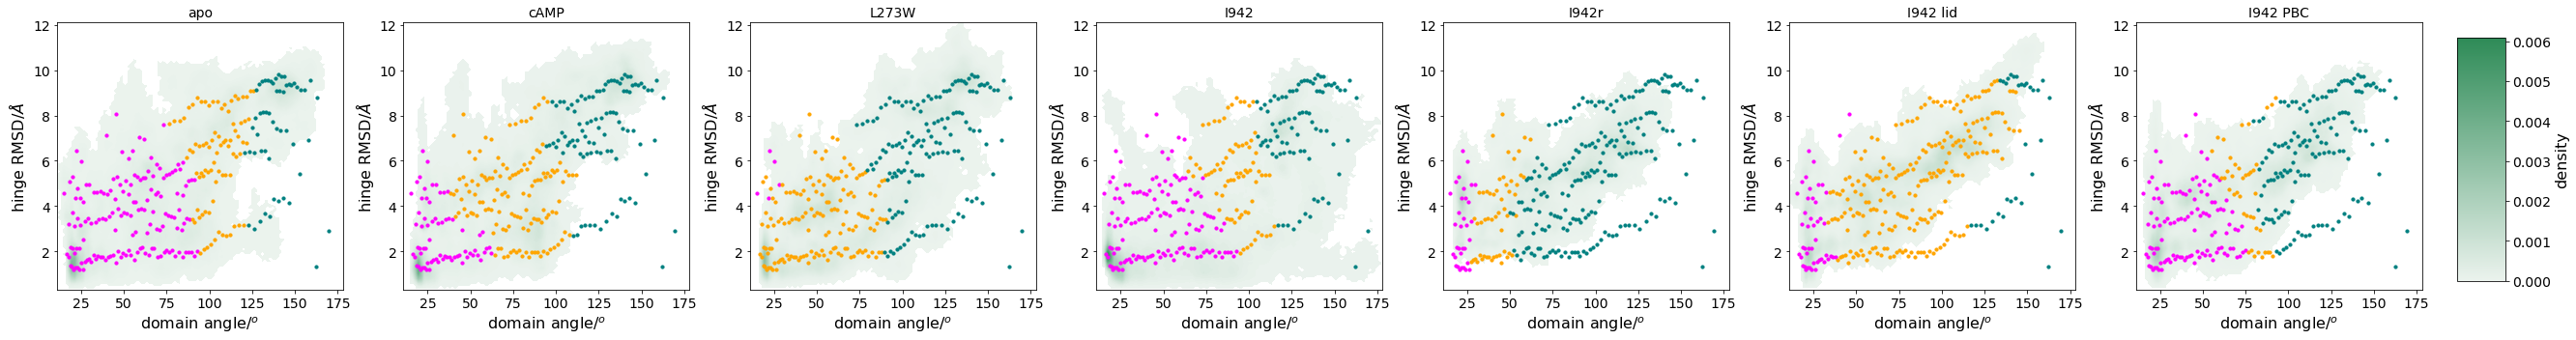

In [656]:
fig, ax, misc = msms.plot_clusters(msms.get_pcca_clusters(3, titles=titles), (1,7), titles=titles, same_clusters=False)

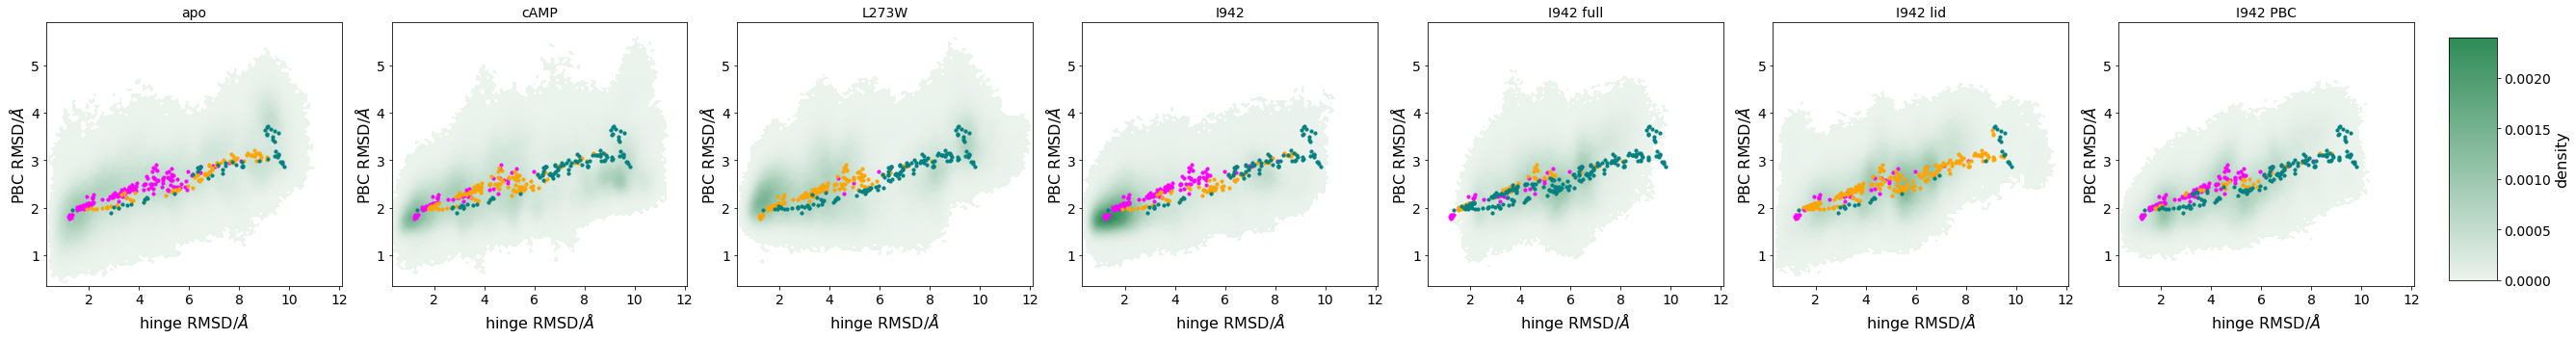

In [658]:
fig, ax, misc = msms.plot_clusters(msms.get_pcca_clusters(3), (1,7), x=1, y=2, titles=titles, same_clusters=False)
fig.savefig('pcca.png', dpi=300)

###  2.2 Manual

[top](#Results)

Assign metastable state centers in feature space. These are based on equilibrium MD simulation results, as well as tracking at what domain angle the RAP protein would clash with cNBD.

In [ ]:
metastable_centers = np.array([[30, 1, 1], [60, 1, 2.5], [100, 8, 2.5]])

Features need to be normalized for distance calculations, otherwise the large degree angle values would contribute the most to the distance. All coordinates are normalized to be up to 1.

In [ ]:
norm = msms.clusters.clustercenters.max(axis=0)
norm_metastable_centers = metastable_centers/norm

Go over each cluster center and assign to the closest metastable center:

In [ ]:
manual_assignment = [[], [], []]

for i, cluster in enumerate(msms.clusters.clustercenters):
    # normalize cluster
    cluster = cluster/norm
    # find closest metastble center
    idx = np.linalg.norm(norm_metastable_centers-cluster, axis=1).argmin()
    manual_assignment[idx].append(i)

manual_assignment = [np.array(state) for state in manual_assignment]

Add to a dummy "manual" MSM for easier use:

In [ ]:
msms.add_msm('manual')
msms['manual'].pcca[3] = manual_assignment

Calculate stationary probabilities and plot:

In [ ]:
msms.pcca_assignments(3, 'manual', titles=titles)

In [ ]:
msms['manual'].cluster_centers = msms.clusters.clustercenters

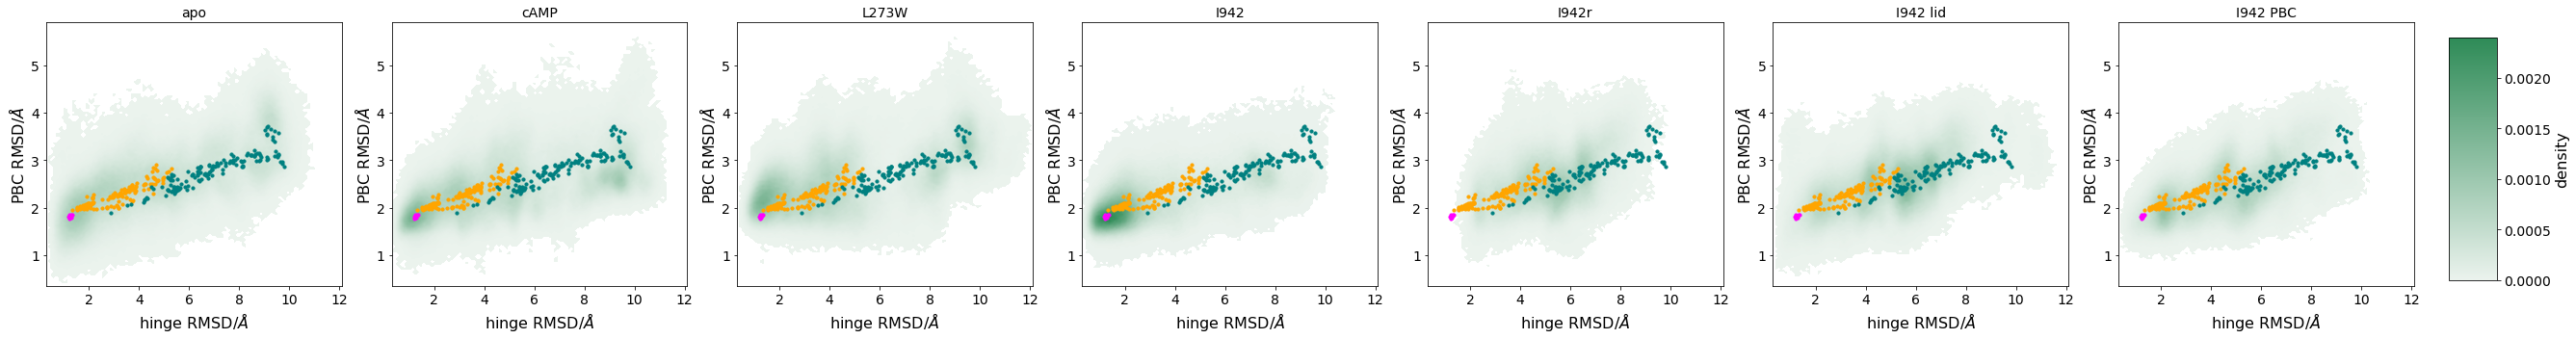

In [559]:
fig, ax, misc = msms.plot_clusters(msms.get_pcca_clusters(3, 'manual')[0], (1,7), titles, x=1, y=2)

Plot the manual state partitioning over stationary probabilities:

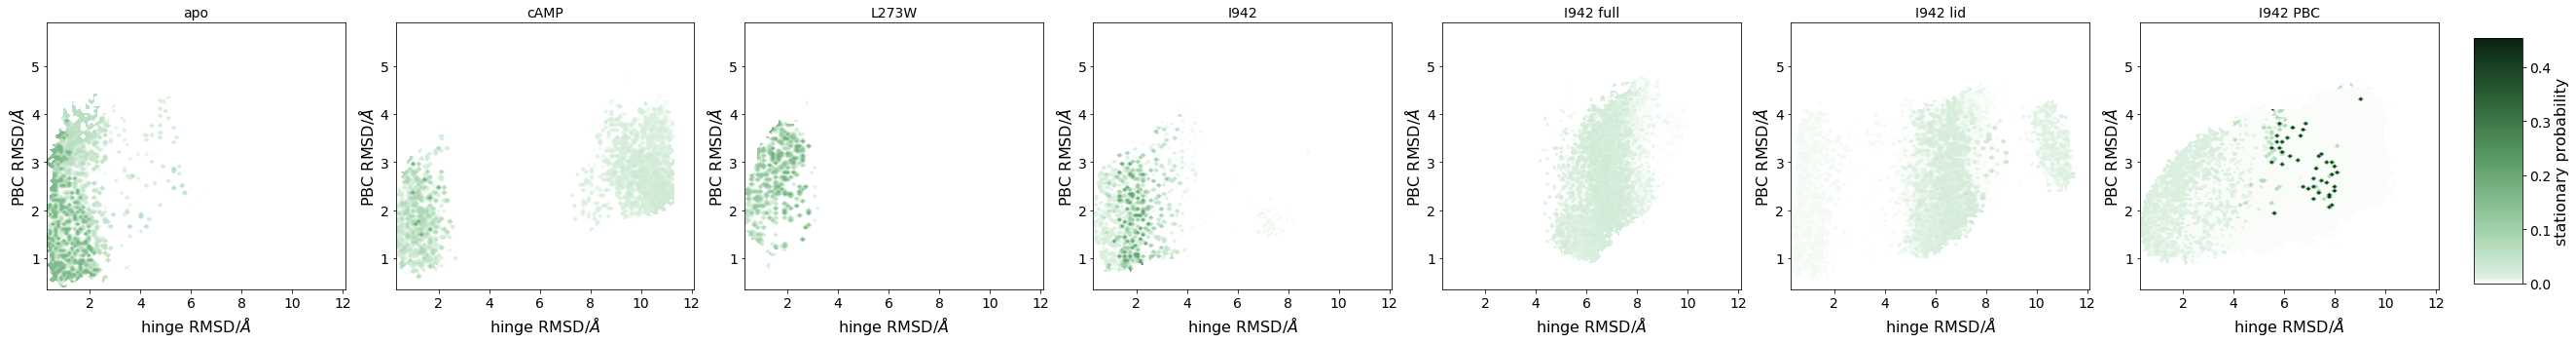

In [592]:
fig, ax, misc = msms.plot_stationary_distribution((1,7), x=1, y=2, titles=titles, cmap=cmap)

for i in range(7):
    for path in ax[0,i].get_children()[-11:]:
        if isinstance(path, collections.PathCollection):
            path.set_alpha(alpha=0)
ax[0,4].set_title('I942 full')
fig.savefig('stationary.png', dpi=300, bbox_inches='tight')

### 2.3 Bootstrapping

[top](#Results)

Run bootstrapping by resampling to generate a distribution of state probabilities. Here the manual state assignment will be used.

In [ ]:
bootstrapped = msms.bootstrapping(3, 'manual', titles, '25 ns')

In [ ]:
msms.save('msms_full.pkl')

Plot probability distribution mean values as a bar plot, with the standard deviation of each distribution as the error.

In [ ]:
colors = [[0.16, 0.2, 0.36], [0.537, 0.741, 0.6196], [0.95, 0.69, 0.16], [0.78, 0.89, 1.0], [0.45, 0.07, 0.13], [0.88, 0.47, 0.08], [0.79, 0.96, 0.80]]
hatches = ['..', 'xx', 'o', '-', '|', '+', '/']

In [ ]:
probabilities = np.array([[msms[msm].bootstrapping_data['manual, 3 states']['probabilities'][:,state].mean() for state in range(3)] for msm in titles])
sdev = np.array([[msms[msm].bootstrapping_data['manual, 3 states']['probabilities'][:,state].std() for state in range(3)] for msm in titles])

In [501]:
state_labels = ['inactive', 'intermediate', 'active']

for i in range(len(titles)):
    print(f'{titles[i]} MSM:')
    for j in range(3):
        print(f'{state_labels[j]} probability: {round(probabilities[i][j], 2)}% (±{round(sdev[i][j], 2)}%)')
    print('-'*30)

apo MSM:
inactive probability: 60.09% (±10.88%)
intermediate probability: 39.49% (±10.8%)
active probability: 0.42% (±0.61%)
------------------------------
cAMP MSM:
inactive probability: 42.45% (±23.04%)
intermediate probability: 16.76% (±8.98%)
active probability: 40.79% (±30.62%)
------------------------------
L273W MSM:
inactive probability: 40.92% (±7.85%)
intermediate probability: 57.63% (±7.68%)
active probability: 1.45% (±7.44%)
------------------------------
I942 MSM:
inactive probability: 33.6% (±9.23%)
intermediate probability: 51.74% (±11.6%)
active probability: 14.66% (±19.39%)
------------------------------
I942r MSM:
inactive probability: 0.0% (±0.0%)
intermediate probability: 0.86% (±0.54%)
active probability: 99.14% (±0.54%)
------------------------------
I942 lid MSM:
inactive probability: 1.75% (±2.44%)
intermediate probability: 7.83% (±8.96%)
active probability: 90.42% (±11.19%)
------------------------------
I942 PBC MSM:
inactive probability: 6.68% (±5.38%)
interm

Plot each state individually:

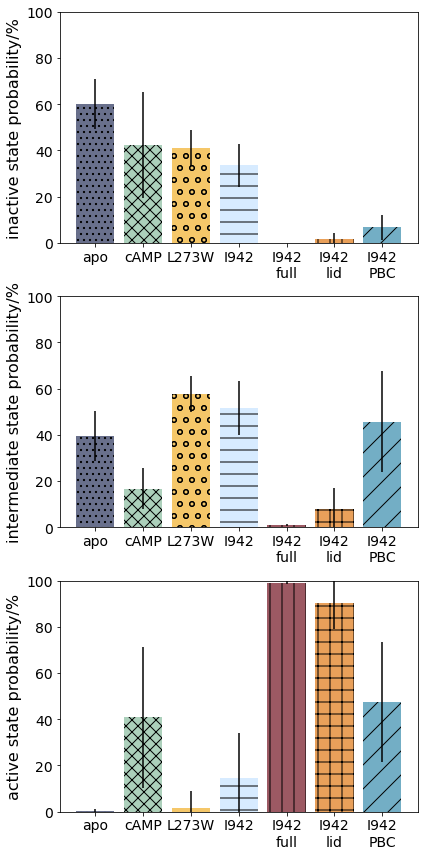

In [623]:
state_labels = ['inactive', 'intermediate', 'active']

fig, ax = plt.subplots(3, 1, figsize=(6,12))

xticklabels = [title.replace(' ','\n') for title in titles]
xticklabels[4] = 'I942\nfull'

for state in range(1,4):
    probabilities = np.array([bootstrapped[msm][state][0] for msm in titles])
    sdev = np.array([bootstrapped[msm][state][1] for msm in titles])
    
    x = np.arange(len(titles))
    
    for i in range(len(titles)):
        ax[state-1].bar(x[i], probabilities[i], yerr=sdev[i], color=colors[i], hatch=hatches[i], alpha=0.7)
    ax[state-1].set_xticks(x)
    ax[state-1].set_xticklabels(xticklabels)
    ax[state-1].set_ylabel(f'{state_labels[state-1]} state probability/%')
    ax[state-1].set_ylim(0, 100)
    
    
fig.tight_layout()
fig.savefig('probabilities_2.png', dpi=300)

## 3. Sample conformational ensembles

### 3.1 Full ensemble

[top](#Results)

The function below samples the seeded MD pool based on the probabilities of the states each frame is assigned to. If the probabilities are not specified, the stationary diustributions from the MSMs are used.

In [ ]:
for title in titles:
    samples = msms[title].sample_weighted_trajectories(10000, f'{msms[title].locations[0]}/stationary.nc', f'{msms[title].locations[0]}/../system-setup/system_dry.prm7')

### 3.2 Active state

[top](#Results)

To compare the active state conformations in each system, only the active state is sampled from the seeded MD data pool here.

In order to only sample the active state, each cluster is checked. If a cluster does not belong to the active conformation according to the manual state assignment above, it is assigned 0% probability, to exclude it from sampling. Stationary probabilities from the MSM are kept for the active macrostate clusters. Additionally, disconnected sets are removed.

All of the probabilities have to sum to 1, so to recover that after exlcuding inactive/intermediate probabilities, the remaining probabilities are reweighted by dividing them by their total sum.

In [ ]:
reweighted_active = []

for title in titles:
    # find all active state probabilities
    active_probabilities = []
    for i, prob in enumerate(msms[title].stationary_distribution):
        # check if cluster connected
        if i in msms[title].msm.connected_sets[0]:
            # check if cluster active
            if i in msms['manual'].pcca[3][2]:
                active_probabilities.append(prob)
            else:
                active_probabilities.append(0)
    # reweight active state probabilities
    active_probabilities = np.array(active_probabilities)
    reweighted = active_probabilities/active_probabilities.sum()
    # check the reweighting worked
    print(f'{title}: active state probabilities sum to {round(active_probabilities.sum(), 3)}, reweighted sum to {round(reweighted.sum(), 2)}')
    reweighted_active.append(reweighted)

Sample the active state only:

In [ ]:
for i, title in enumerate(titles):
    samples = msms[title].sample_weighted_trajectories(10000, f'{msms[title].locations[0]}/active.nc', f'{msms[title].locations[0]}/../system-setup/system_dry.prm7', [reweighted_active[i]])

## 4. Relevant conformation plots

In [491]:
def plot_distributions(data, indices, colors, hatches, xlabel, hspace=-0.25, aspect=2, height=3, baseline=None, xlims=None):
    grid = sns.FacetGrid(data, row='labels', aspect=aspect, height=height)
    grid.map_dataframe(sns.kdeplot, 'data', clip_on=False, fill=True, multiple='stack')
    grid.map(plt.axhline, y=0, lw=2, clip_on=False, color='black')

    for i in range(len(indices)):
        grid.axes[i][0].get_children()[0].set_facecolor(colors[indices[i]])
        grid.axes[i][0].get_children()[0].set_alpha(0.7)
        grid.axes[i][0].get_children()[0].set_hatch(hatches[indices[i]])
        grid.axes[i][0].get_children()[0].set_edgecolor('white')
        grid.axes[i][0].patch.set_alpha(0)
        if xlims is not None:
            grid.axes[i][0].set_xlim(xlims[0], xlims[1])
        if baseline is not None:
            lims = grid.axes[i][0].get_ylim()
            grid.axes[i][0].vlines(df[df['labels']==baseline].median()[0], lims[0], lims[1]+(2*hspace)+lims[1]/10, linestyles='--', color='black')

    def labelf(x, color):
        ax = plt.gca()
        ax.text(0, .2, x.iloc[0], fontweight="bold", color='black',
                ha="left", va="center", transform=ax.transAxes)

    grid.map(labelf, 'labels')

    grid.fig.subplots_adjust(hspace=hspace)

    grid.set_titles('')
    grid.set(yticks=[], xlabel='distance/$\AA$', ylabel='')
    grid.despine(bottom=True, left=True)
    
    return grid

### 4.1 cAMP Hbonds

[top](#Results)

In [ ]:
output = '../systems/cAMP/active/seeded-md_2step/hbonds.txt'

with open('../systems/cAMP/active/seeded-md_2step/hbonds.in', 'w') as file:
    file.writelines(['parm ../systems/cAMP/active/system-setup/system_dry.prm7\n',
                     'trajin ../systems/cAMP/active/seeded-md_2step/stationary.nc\n',
                    f"distance G269 :SP1@O2' :222@N out {output}\n",
                    f"distance R279 :SP1@O2P :232@NH1 out {output}\n",
                    f"distance A280 :SP1@O1P :233@N out {output}\n",
                    f"distance A281 :SP1@O1P :234@N out {output}\n",
                    f"distance K353 :SP1@N1 :306@NZ out {output}\n",
                    f"distance E315 :SP1@N6 :268@O out {output}\n",
                    f"go\nquit\n"])
    
subprocess.run(['cpptraj', '-i', '../systems/cAMP/active/seeded-md_2step/hbonds.in'], stdout=subprocess.DEVNULL)

In [308]:
camp_hbonds = pd.read_csv('../systems/cAMP/active/seeded-md_2step/hbonds.txt', delim_whitespace=True).iloc[:,1:]

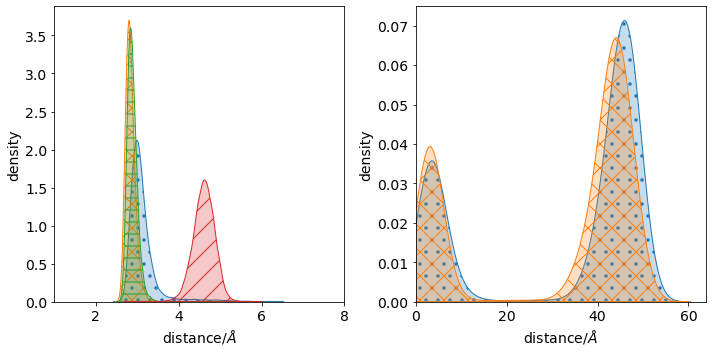

In [500]:
bonds = [['G269', 'R279', 'A280', 'A281'], ['K353', 'E315']]

fig, ax = plt.subplots(1, 2, figsize=(10,5))

hatches = ['.', 'x', '-', '/']

for i in range(2):
    for j in range(len(bonds[i])):
        sns.kdeplot(camp_hbonds[bonds[i][j]], ax=ax[i], shade=True, hatch=hatches[j], label=bonds[i][j])
    ax[i].set_xlabel('distance/$\AA$', size=14)
    ax[i].set_ylabel('density', size=14)
    #ax[i].legend()

ax[0].set_xlim(1,8)
ax[1].set_xlim(0,None)

fig.tight_layout()
fig.savefig('cAMP_hbonds.png', dpi=300)

### 4.2 PBC conformation

[top](#Results)

In [620]:
colors = [[0.16, 0.2, 0.36], [0.537, 0.741, 0.6196], [0.95, 0.69, 0.16], [0.78, 0.89, 1.0], [0.45, 0.07, 0.13], [0.88, 0.47, 0.08], [0.22, 0.55, 0.68]]
hatches = ['..', 'xx', 'o', '-', '|', '+', '/']

In [594]:
for title in titles:
    loc = msms[title].locations[0]
    with open(f'{loc}/pbc_dist.in', 'w') as file:
        file.writelines([f'parm {loc}/../system-setup/system_dry.prm7\n',
                         f'trajin {loc}/stationary.nc\n',
                         f'distance :222&(@CA,C,N,O) :232-234&(@CA,C,N,O) out {loc}/pbc_distance.txt\n'
                          'go\nquit\n'])
    subprocess.run(['cpptraj', '-i', f'{loc}/pbc_dist.in'], stdout=subprocess.DEVNULL)

In [595]:
pbc_distance = [np.loadtxt(f'{msms[title].locations[0]}/pbc_distance.txt')[:,1] for title in titles]    

Plot apo, cAMP and L273W:

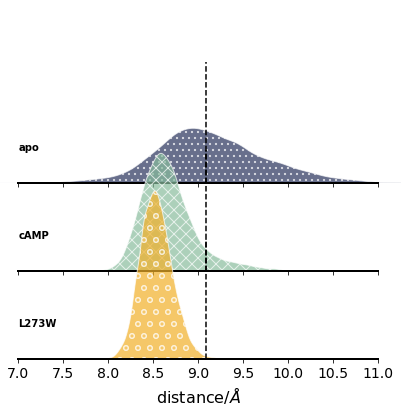

In [599]:
data = np.hstack([pbc_distance[i] for i in range(3)])
labels = np.hstack([[title for i in range(10000)] for title in titles[:3]])

df = pd.DataFrame({'data': data, 'labels': labels})

grid = plot_distributions(df, [0,1,2], colors, hatches, 'distance/$\AA$', -0.5, 3, 2, 'apo', (7,11))
grid.fig.savefig('PBC_distance_1.png', dpi=300)

Plot I942 and I942 fully restrained:

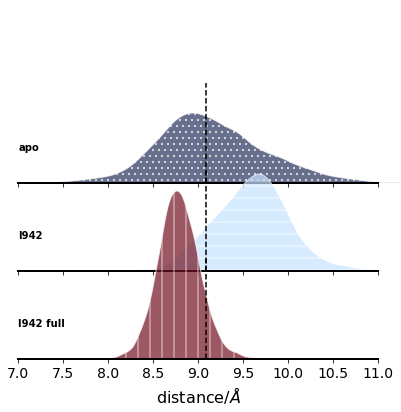

In [604]:
data = np.hstack([pbc_distance[i] for i in [0,3,4]])
labels = np.hstack([[title for i in range(10000)] for title in ['apo', 'I942', 'I942 full']])

df = pd.DataFrame({'data': data, 'labels': labels})

grid = plot_distributions(df, [0,3,4], colors, hatches, 'distance/$\AA$', -0.5, 3, 2, 'apo', (7,11))
grid.fig.savefig('PBC_distance_2.png', dpi=300)

Plot apo, I942 with just the lid and just the PBC restrained:

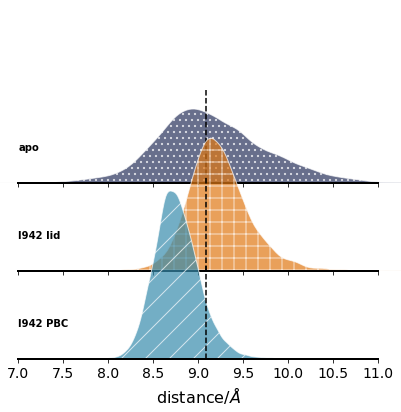

In [621]:
data = np.hstack([pbc_distance[i] for i in [0,5,6]])
labels = np.hstack([[title for i in range(10000)] for title in ['apo', 'I942 lid', 'I942 PBC']])

df = pd.DataFrame({'data': data, 'labels': labels})

grid = plot_distributions(df, [0,5,6], colors, hatches, 'distance/$\AA$', -0.5, 3, 2, 'apo', (7,11))
grid.fig.savefig('PBC_distance_3.png', dpi=300)

### 4.3 Hinge RMSF 

[top](#Results)

In [253]:
for i in [4,5,6]:#range(len(titles)):
    loc = locations[i][0]
    with open('hinge_rmsf.in', 'w') as file:
        file.writelines([f'parm {loc}/../system-setup/system_dry.prm7\n',
                         f'trajin {loc}/stationary.nc\n',
                          'parm ../inputs/inactive.pdb name ref_parm\n',
                          'reference ../inputs/inactive.pdb parm ref_parm\n',
                          'rms :250-256&(!@/H) reference\n',
                         f'rmsf out {loc}/hinge_rmsf.txt :250-263&(!@/H) byres\n',
                          'go\nquit\n'])
    subprocess.run(['cpptraj', '-i', 'hinge_rmsf.in'], stdout=subprocess.DEVNULL)

In [254]:
hinge_rmsf = [np.loadtxt(f'{msms[title].locations[0]}/hinge_rmsf.txt')[:,1] for title in titles]

Plot apo, cAMP, and L273W:

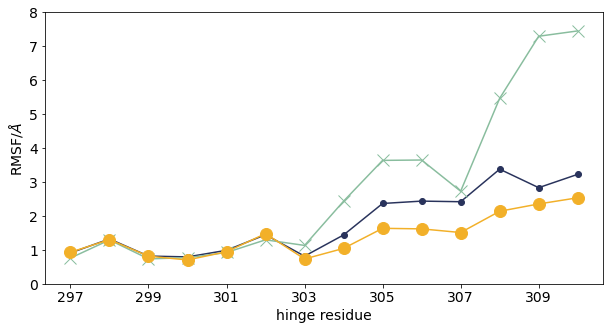

In [257]:
fig, ax = plt.subplots(1, figsize=(10,5))

x = np.arange(250,264)

for i in range(3):
    ax.plot(x, hinge_rmsf[i], marker=markers[i], markersize=12, color=colors[i])

ax.set_xlabel('hinge residue', size=14)
ax.set_ylabel('RMSF/$\AA$', size=14)
ax.set_ylim(0, 8)

ax.set_xticklabels([None, 297, 299, 301, 303, 305, 307, 309])

fig.savefig('hinge_rmsf_1.png', dpi=300)

Plot cAMP, I942, and I942r:

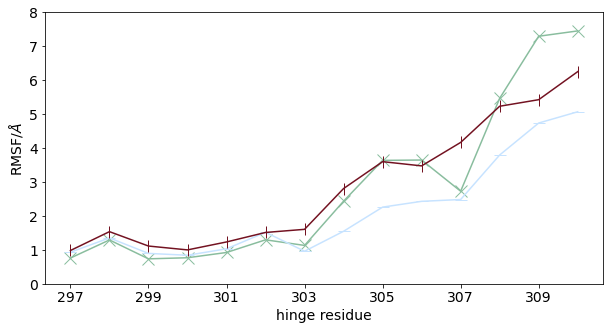

In [602]:
fig, ax = plt.subplots(1, figsize=(10,5))

markers = ['.', 'x', 'o', '_', '|', '+', 'D']

x = np.arange(250,264)

for i in [1, 3, 4]:
    ax.plot(x, hinge_rmsf[i], marker=markers[i], markersize=12, color=colors[i])

ax.set_xlabel('hinge residue', size=14)
ax.set_ylabel('RMSF/$\AA$', size=14)
ax.set_ylim(0, 8)

ax.set_xticklabels([None, 297, 299, 301, 303, 305, 307, 309])

fig.savefig('hinge_rmsf_2.png', dpi=300)

Plot cAMP, I942 with just the lid and just the PBC restrained:

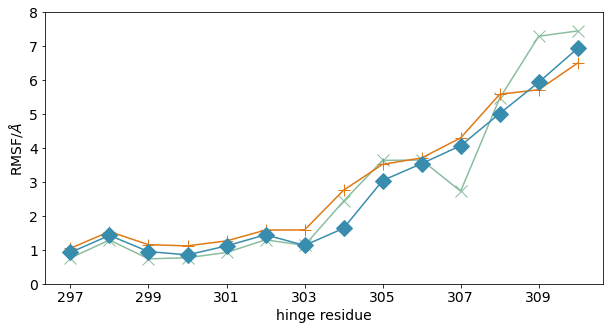

In [622]:
fig, ax = plt.subplots(1, figsize=(10,5))

markers = ['.', 'x', 'o', '_', '|', '+', 'D']

x = np.arange(250,264)

for i in [1, 5, 6]:
    ax.plot(x, hinge_rmsf[i], marker=markers[i], markersize=12, color=colors[i])

ax.set_xlabel('hinge residue', size=14)
ax.set_ylabel('RMSF/$\AA$', size=14)
ax.set_ylim(0, 8)

ax.set_xticklabels([None, 297, 299, 301, 303, 305, 307, 309])

fig.savefig('hinge_rmsf_3.png', dpi=300)

### 4.4 Residue 273 $\chi$1 angle

[top](#Results)

In [ ]:
leu273 = []

for i in range(len(titles)):
    loc = locations[i][0]
    with open('Leu226_chi.in', 'w') as file:
        file.writelines([f'parm {loc}/../system-setup/system_dry.prm7\n',
                         f'trajin {loc}/stationary.nc\n',
                         f'dihedral 226_chi :226@N :226@CA :226@CB :226@CG out {loc}/Leu226_chi.txt\n',
                          'go\nquit\n'])
    subprocess.run(['cpptraj', '-i', 'Leu226_chi.in'], stdout=subprocess.DEVNULL)
    
    data = np.loadtxt(f'{loc}/Leu226_chi.txt')[:,1]
    leu273.append(data)

Plot apo, cAMP, and L273W:

In [ ]:
fig, ax = plt.subplots(1, figsize=(5,5))

colors = [[0.16, 0.2, 0.36], [0.537, 0.741, 0.6196], [0.95, 0.69, 0.16], [0.78, 0.89, 1.0], [0.45, 0.07, 0.13]]
hatches = ['..', 'xx', 'o', '-', '|']

for i in range(3):
    sns.kdeplot(leu273[i], ax=ax, shade=True, hatch=hatches[i], color=colors[i], alpha=0.5)

ax.set_xlabel('Residue 273 $\chi$1 angle/$^{o}$', size=14)
ax.set_ylabel('density', size=14)

fig.savefig('leu226_1.png', dpi=300, bbox_inches='tight')

Plot cAMP, I942, and I942r:

In [ ]:
fig, ax = plt.subplots(1, figsize=(5,5))

colors = [[0.16, 0.2, 0.36], [0.537, 0.741, 0.6196], [0.95, 0.69, 0.16], [0.78, 0.89, 1.0], [0.45, 0.07, 0.13]]
hatches = ['..', 'xx', 'o', '-', '|']

for i in [1, 3, 4]:
    sns.kdeplot(leu273[i], ax=ax, shade=True, hatch=hatches[i], color=colors[i], alpha=0.5)

ax.set_xlabel('L273 $\chi$1 angle/$^{o}$', size=14)
ax.set_ylabel('density', size=14)

fig.savefig('leu226_2.png', dpi=300, bbox_inches='tight')

### 4.5 I942 Hbonds

[top](#Results)

In [497]:
i942_hbonds = pd.read_csv('../systems/I942/active/seeded-md_2step/I942_hbonds.txt', delim_whitespace=True).iloc[:,1:]

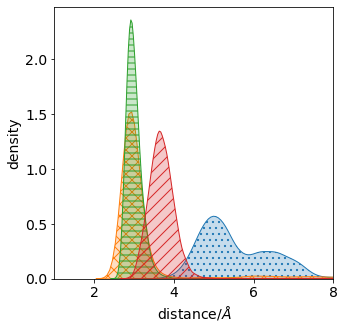

In [499]:
fig, ax = plt.subplots(1, figsize=(5,5))

hatches = ['..', 'xx', '--', '//']

for i in range(len(i942_hbonds.columns)):
    sns.kdeplot(i942_hbonds.iloc[:,i], ax=ax, shade=True, hatch=hatches[i])
    
ax.set_ylabel('density', size=14)
ax.set_xlabel('distance/$\AA$', size=14)
ax.set_xlim(1, 8)

fig.savefig('I942_hbonds.png', dpi=300)